In [1]:
#from talib import abstract
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
df = pd.read_csv('./data/FITXN_1k.csv', usecols=['日期時間','開盤','最高','最低','收盤', '成交量'],)
df.sort_values(by=['日期時間'], inplace=True)
print(df.shape)
print(df.head(4))
print(df.tail(4))
print(df.dtypes)

(62655, 6)
                   日期時間       開盤       最高       最低       收盤  成交量
62654  2019/12/24 15:01  11980.0  11983.0  11976.0  11980.0  269
62653  2019/12/24 15:02  11979.0  11981.0  11978.0  11979.0  139
62652  2019/12/24 15:03  11979.0  11982.0  11978.0  11982.0   57
62651  2019/12/24 15:04  11981.0  11982.0  11981.0  11982.0   24
               日期時間      開盤      最高      最低      收盤   成交量
3  2020/03/20 13:42  9110.0  9120.0  9094.0  9099.0  1026
2  2020/03/20 13:43  9099.0  9099.0  9084.0  9091.0   901
1  2020/03/20 13:44  9093.0  9093.0  9076.0  9080.0   981
0  2020/03/20 13:45  9080.0  9081.0  9005.0  9041.0  2557
日期時間     object
開盤      float64
最高      float64
最低      float64
收盤      float64
成交量       int64
dtype: object


In [3]:
df.rename(columns={"日期時間": "tx_time", "開盤": "open", "最高": "high", "最低": "low", "成交量":"volume",
                  '收盤':'close', }, inplace=True)
df.index = df.tx_time
df.drop(columns=['tx_time'], inplace=True)

In [4]:
print(df.head(5))
print(df.tail(5))

                     open     high      low    close  volume
tx_time                                                     
2019/12/24 15:01  11980.0  11983.0  11976.0  11980.0     269
2019/12/24 15:02  11979.0  11981.0  11978.0  11979.0     139
2019/12/24 15:03  11979.0  11982.0  11978.0  11982.0      57
2019/12/24 15:04  11981.0  11982.0  11981.0  11982.0      24
2019/12/24 15:05  11982.0  11983.0  11982.0  11983.0      58
                    open    high     low   close  volume
tx_time                                                 
2020/03/20 13:41  9097.0  9111.0  9091.0  9109.0     794
2020/03/20 13:42  9110.0  9120.0  9094.0  9099.0    1026
2020/03/20 13:43  9099.0  9099.0  9084.0  9091.0     901
2020/03/20 13:44  9093.0  9093.0  9076.0  9080.0     981
2020/03/20 13:45  9080.0  9081.0  9005.0  9041.0    2557


## 指數平滑化

In [5]:
df.close = np.log1p(df.close)
df.open = np.log1p(df.open)
df.high = np.log1p(df.high)
df.low = np.log1p(df.low)
df.volume = np.log1p(df.volume)


In [6]:
print(df.tail(4))

                      open      high       low     close    volume
tx_time                                                           
2020/03/20 13:42  9.117238  9.118335  9.115480  9.116030  6.934397
2020/03/20 13:43  9.116030  9.116030  9.114380  9.115150  6.804615
2020/03/20 13:44  9.115370  9.115370  9.113499  9.113940  6.889591
2020/03/20 13:45  9.113940  9.114050  9.105646  9.109636  7.846981


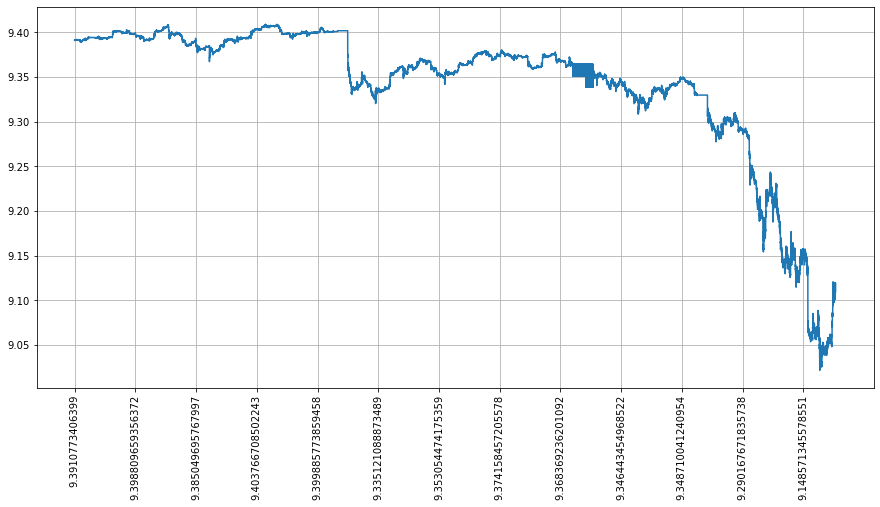

In [7]:
plt.figure(figsize = (15,7))
plt.plot(
    np.arange(len(df.close)),
    df.close,
    label = 'close',
)
plt.xticks(np.arange(len(df.close))[::5000], 
           df.close[::5000], rotation = 'vertical') # 如果只是看趨勢，也可以不畫X軸資訊，但如果要加建議設個間隔，避免畫面擠滿文數字
plt.grid()
plt.show()

## for talib

In [8]:

# SMA = abstract.SMA(df)
# RSI = abstract.RSI(df)
# STOCH = abstract.STOCH(df)

# from finlab.plot_candles import plot_candles
# plot_candles(
#              # 起始時間、結束時間
#              start_time='2011-02-18 05:00:00',
#              end_time='2011-02-22 05:00:00',
             
#              # 股票的資料
#              pricing=df, 
#              title='Candles', 
    
#              # 是否畫出成交量？
#              volume_bars=True, 
    
#              # 將某些指標（如SMA）跟 K 線圖畫在一起
#              overlays=[SMA], 
    
#              # 將某些指標（如RSI, STOCH）單獨畫在獨立的畫格中
#              technicals = [RSI, STOCH],
    
#              # 重新命名額外的畫格名稱（跟指標名稱一樣就可以囉！）
#              technicals_titles=['RSI', 'KD']
#             )

## 切分X, Y

In [9]:
df.iloc[0]
y_train = df.loc[:, 'close']
print(y_train.iloc[0:3])
x_train = df.loc[:, ['open','high', 'low', 'volume']]
print(x_train.head(3))

tx_time
2019/12/24 15:01    9.391077
2019/12/24 15:02    9.390994
2019/12/24 15:03    9.391244
Name: close, dtype: float64
                      open      high       low    volume
tx_time                                                 
2019/12/24 15:01  9.391077  9.391328  9.390743  5.598422
2019/12/24 15:02  9.390994  9.391161  9.390910  4.941642
2019/12/24 15:03  9.390994  9.391244  9.390910  4.060443


## Window方法2

In [10]:
# 抓取window_size的資料作為觀察資料(x), 下一天作為預測資料(y)


def window_data(x_train, y_train, window_size):
    X = []
    y = []
    i = 0
    while (i + window_size) <= (len(x_train) - 1 ): #保留最後1個Window作預測
        #print("i=%d, i+window_size=%d" % (i, (i+window_size)))
        x_row = x_train.iloc[i:i+window_size]
        X.append(x_row.values)
        y_row = y_train.iloc[i+window_size]
        y.append(y_row)
        i += 1
    X = np.array(X)
    y = np.array(y)
    assert len(X) == len(y)
    return X, y

window_size = 20
X, y = window_data(x_train, y_train, window_size)
print(f'X.shape={X.shape}, y.shape={y.shape}')

X.shape=(62635, 20, 4), y.shape=(62635,)


## 整理 Train, Test data

In [11]:
print(df.shape) # 74278筆
print(X.shape) #74268
print(y.shape) #74268
## x_train = 74268筆

(62655, 5)
(62635, 20, 4)
(62635,)


## 建模時切分train, test 當作validation

In [12]:
validation_n = 55000

X_train = X[0:validation_n]
y_train = y[0:validation_n]

# 七萬筆後當驗證資料
X_valid = X[validation_n:]
y_valid = y[validation_n:]

print("X_train size: {}".format(X_train.shape))
print("y_train size: {}".format(y_train.shape))
print("X_valid size: {}".format(X_valid.shape))
print("y_valid size: {}".format(y_valid.shape))

X_train size: (55000, 20, 4)
y_train size: (55000,)
X_valid size: (7635, 20, 4)
y_valid size: (7635,)


## BUILD MODEL

In [13]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, LSTM, GRU
from tensorflow.python.keras.layers import TimeDistributed, Flatten
from tensorflow.keras.optimizers import Adam

In [14]:
model = Sequential()
model.add(GRU(units=32, activation='tanh', return_sequences=True))
model.add(GRU(units=16, activation='tanh', return_sequences=False))
model.add(Flatten())
model.add(Dense(units=16))
model.add(Dense(units=8))
#model.add(Dense(units=8))
model.add(Dense(units=1))

opt = Adam(lr=0.001, decay=1e-6, clipvalue=5)
model.compile(loss='mse', optimizer=opt, metrics=['mse'])

In [15]:
history = model.fit(X, y, epochs=2,  validation_data=(X_valid,y_valid))

Train on 62635 samples, validate on 7635 samples
Epoch 1/2
62635/62635 [==============================] - 133s 2ms/sample - loss: 0.8719 - mse: 0.8719 - val_loss: 0.0269 - val_mse: 0.0269
Epoch 2/2
62635/62635 [==============================] - 127s 2ms/sample - loss: 0.0023 - mse: 0.0023 - val_loss: 6.4475e-04 - val_mse: 6.4475e-04


In [16]:
model.save_weights('./model/model_fitx1_gru.h5')

## 產生預測值

In [17]:
valid_pred = model.predict(X_valid)

In [18]:
valid_pred

array([[9.303274],
       [9.304529],
       [9.313797],
       ...,
       [9.104438],
       [9.107018],
       [9.108305]], dtype=float32)

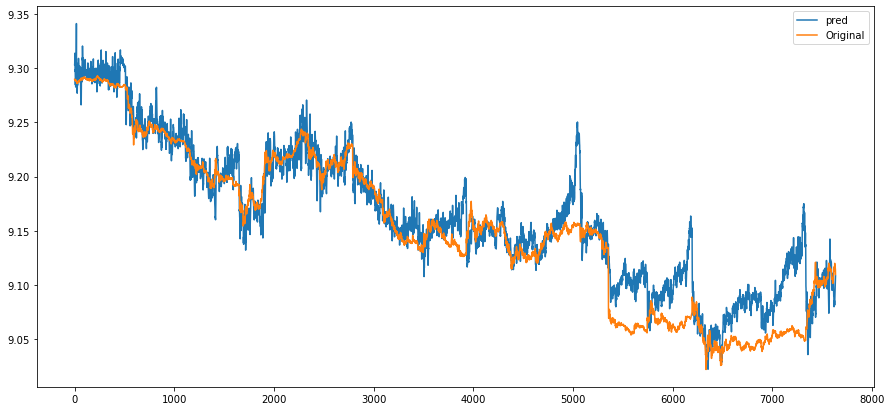

In [19]:
plt.figure(figsize=(15,7))
plt.plot(np.squeeze(valid_pred),label='pred')
plt.plot(np.squeeze(y_valid),label='Original')
plt.legend()
plt.show()

## 取出最後一個Window

In [20]:
# 取X中最後一組資料筆數
print(X.shape)
print(X[-1].shape)
last_window = X[-1] #取得最後一個Window
print(last_window.shape)
last_window = last_window[np.newaxis,:, :] #組成3維arr
print(last_window.shape)

(62635, 20, 4)
(20, 4)
(20, 4)
(1, 20, 4)


## 產生預測值

In [21]:
rs = model.predict(last_window)
rs = np.expm1(rs)
print(rs)

[[9028.976]]


In [ ]:

# n_pred_timestamp = 1

# df_list = list(data.flatten()) # data是原始資料, 轉成list
# data_ = np.array(df_list + [np.nan]*n_pred_timestamp) #data_ = 原始資料， 加上30筆NAN
# print("data_ type:", type(data_))
# print(data_.shape)
# train_size = len(data) #74278,   window=10, n_output_timestamp=1 

# #74267-74297 共30筆(產生30個Window)
# start = len(data) - window - n_output_timestamp  #74267
# end = len(data) - window - n_output_timestamp + n_pred_timestamp
# for i in range(start, end):   
    
#     X_test = data_[None, i:i+window, None] # = 從data_取10筆作Window
#     assert(np.isnan(X_test).sum()==0 )
#     print(i, X_test.shape)
#     y_test = model(X_test) #丟入Model #產生1筆預測值
#     assert(y_test.shape==(1,1) )
#     data_[i+window+1] = float(y_test)